In [7]:
import pandas as pd
import numpy as np
import tensorflow 
import keras
import scipy

below is for big data frame

In [2]:
from sklearn.model_selection import train_test_split
 
# load the dataset
def load_dataset(filename, numbases):
	# load the dataset as a pandas DataFrame
	data = pd.read_csv(filename)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, 1+numbases:81]
	y = dataset[:, 81]
	# format all fields as string
	X = X.astype(str)
	# reshape target to be a 2d array
	y = y.reshape((len(y), 1))
	return X, y
 
# load the dataset
X, y = load_dataset('test_gcmatch4.csv', 0)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (757, 80) (757, 1)
Test (325, 80) (325, 1)


In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def prepare_inputs(X_train, X_test):
	ohe = OneHotEncoder()
	ohe.fit(X_train)
	X_train_enc = ohe.transform(X_train)
	X_test_enc = ohe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)


c:\Users\shssm\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shssm\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
from keras.models import Sequential
from keras.layers import Dense

def fitandeval(X_train_enc, y_train_enc, num):
    # define the  model
    model = Sequential()
    model.add(Dense(10, input_dim=X_train_enc.shape[1], activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(1, activation='sigmoid'))
    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit the keras model on the dataset
    model.fit(X_train_enc, y_train_enc, epochs=num, batch_size=32, verbose=2)
    # evaluate the keras model
    _, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
    return accuracy

print('Accuracy: %.2f' % (fitandeval(X_train_enc, y_train_enc, 600)*100))

Epoch 1/600


c:\Users\shssm\anaconda\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


24/24 - 1s - loss: 0.7048 - accuracy: 0.5561 - 1s/epoch - 45ms/step
Epoch 2/600
24/24 - 0s - loss: 0.6584 - accuracy: 0.5997 - 39ms/epoch - 2ms/step
Epoch 3/600
24/24 - 0s - loss: 0.6253 - accuracy: 0.6513 - 46ms/epoch - 2ms/step
Epoch 4/600
24/24 - 0s - loss: 0.6005 - accuracy: 0.6684 - 38ms/epoch - 2ms/step
Epoch 5/600
24/24 - 0s - loss: 0.5745 - accuracy: 0.7094 - 38ms/epoch - 2ms/step
Epoch 6/600
24/24 - 0s - loss: 0.5536 - accuracy: 0.7305 - 46ms/epoch - 2ms/step
Epoch 7/600
24/24 - 0s - loss: 0.5312 - accuracy: 0.7543 - 40ms/epoch - 2ms/step
Epoch 8/600
24/24 - 0s - loss: 0.5131 - accuracy: 0.7583 - 43ms/epoch - 2ms/step
Epoch 9/600
24/24 - 0s - loss: 0.4962 - accuracy: 0.7807 - 40ms/epoch - 2ms/step
Epoch 10/600
24/24 - 0s - loss: 0.4745 - accuracy: 0.8018 - 44ms/epoch - 2ms/step
Epoch 11/600
24/24 - 0s - loss: 0.4560 - accuracy: 0.8045 - 38ms/epoch - 2ms/step
Epoch 12/600
24/24 - 0s - loss: 0.4389 - accuracy: 0.8362 - 38ms/epoch - 2ms/step
Epoch 13/600
24/24 - 0s - loss: 0.4218

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

lala = model.fit(X_train_enc, y_train_enc, epochs=600)

In [38]:

X_tune = X_train_enc.asformat("array")
y_tune = y_train_enc.copy()

count = 0
for i in y_tune:
    count += 1
print(count)

X_tune = X_tune.reshape(757, 320,)

y_tune = y_tune.reshape(757,)

757


In [48]:
import keras_tuner as kt

def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(320,)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model


tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_tune, y_tune, epochs=50, validation_split=0.3, callbacks=[keras.callbacks.TensorBoard("/tmp/tb_logs")],)

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Reloading Oracle from existing project my_dir\intro_to_kt\oracle.json
INFO:tensorflow:Reloading Tuner from my_dir\intro_to_kt\tuner0.json
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 224 and the optimal learning rate for the optimizer
is 0.001.



In [49]:
%load_ext tensorboard

%tensorboard --logdir /tmp/tb_logs

In [43]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_tune, y_tune, epochs=50, validation_split=0.3)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
17/17 [==============================] - 1s 22ms/step - loss: 1.0312 - accuracy: 0.5369 - val_loss: 0.7376 - val_accuracy: 0.5132
Epoch 2/50
17/17 [==============================] - 0s 13ms/step - loss: 0.5769 - accuracy: 0.6900 - val_loss: 0.7223 - val_accuracy: 0.5088
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.7958 - val_loss: 0.7309 - val_accuracy: 0.5263
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 0.3981 - accuracy: 0.8696 - val_loss: 0.7433 - val_accuracy: 0.5614
Epoch 5/50
17/17 [==============================] - 0s 5ms/step - loss: 0.3392 - accuracy: 0.9206 - val_loss: 0.7783 - val_accuracy: 0.5702
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2991 - accuracy: 0.9206 - val_loss: 0.8196 - val_accuracy: 0.5658
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2498 - accuracy: 0.9584 - val_loss: 0.8473 - val_accuracy: 0.5658
Epoch 8/50
17/17 [

In [44]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_tune, y_tune, epochs=best_epoch, validation_split=0.3)

Epoch 1/48
17/17 [==============================] - 1s 18ms/step - loss: 1.0638 - accuracy: 0.5217 - val_loss: 0.6780 - val_accuracy: 0.5833
Epoch 2/48
17/17 [==============================] - 0s 5ms/step - loss: 0.5576 - accuracy: 0.7127 - val_loss: 0.6656 - val_accuracy: 0.6053
Epoch 3/48
17/17 [==============================] - 0s 4ms/step - loss: 0.4600 - accuracy: 0.8091 - val_loss: 0.6871 - val_accuracy: 0.6053
Epoch 4/48
17/17 [==============================] - 0s 4ms/step - loss: 0.3866 - accuracy: 0.8715 - val_loss: 0.7169 - val_accuracy: 0.5526
Epoch 5/48
17/17 [==============================] - 0s 4ms/step - loss: 0.3514 - accuracy: 0.8904 - val_loss: 0.7442 - val_accuracy: 0.5833
Epoch 6/48
17/17 [==============================] - 0s 5ms/step - loss: 0.2887 - accuracy: 0.9319 - val_loss: 0.7949 - val_accuracy: 0.5921
Epoch 7/48
17/17 [==============================] - 0s 4ms/step - loss: 0.2439 - accuracy: 0.9546 - val_loss: 0.8366 - val_accuracy: 0.5921
Epoch 8/48
17/17 [=

In [47]:
X_testy = X_test_enc.asformat("array")
y_testy = y_test_enc.copy()

X_testy = X_testy.reshape(325, 320,)

y_testy = y_testy.reshape(325,)

eval_result = hypermodel.evaluate(X_testy, y_testy)
print("[test loss, test accuracy]:", eval_result)

11/11 [==============================] - 0s 1ms/step - loss: 1.6906 - accuracy: 0.5877
[test loss, test accuracy]: [1.69057035446167, 0.5876923203468323]


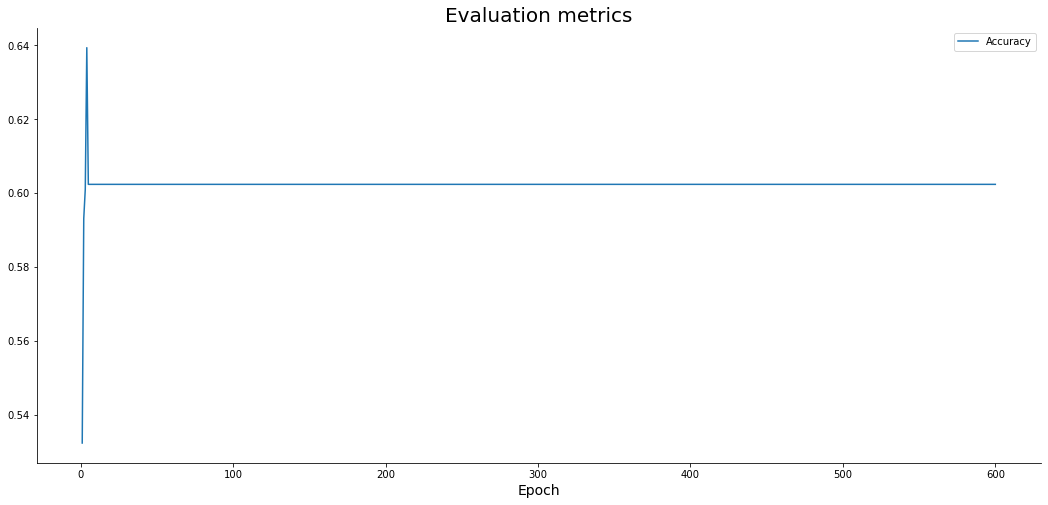

In [45]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False


plt.plot(
    np.arange(1, 601), 
    lala.history['accuracy'], label='Accuracy'
)

plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [46]:
results = model.evaluate(X_test_enc, y_test_enc)
print(results)

11/11 [==============================] - 1s 2ms/step - loss: 0.6824 - accuracy: 0.5723 - precision: 0.5723 - recall: 1.0000
[0.682428240776062, 0.5723077058792114, 0.5723077058792114, 1.0]


In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = accs
s = [75 - n for n in range(0,75)]

fig, ax = plt.subplots()
ax.plot(s, t)

ax.set(xlabel='number of bases in each flank', ylabel='accuracy score',
       title='optimization - Neural Network')
ax.grid()

fig.savefig("test.png")
plt.show()

NameError: name 'accs' is not defined